In [1]:
import pandas as pd
data = pd.read_csv('yoga_recommendation_data.csv')

In [2]:
data.head()

,Example,Mood,Recommendation
0,Feeling sooo tired right now!,Tired,Bikram Yoga
1,feelin' kinda tired today,Tired,Bikram Yoga
2,"Probably tired, not sure though.",Tired,Bikram Yoga
3,Sorta tired... does that count?,Tired,Bikram Yoga
4,"coffee first, then tired mood",Tired,Bikram Yoga


In [3]:
data['Example'].unique()

array(['Feeling sooo tired right now!', "feelin' kinda tired today",
       'Probably tired, not sure though.', ...,
       'I’m grateful for today’s abundance',
       'I’m feeling amazing and grateful today',
       'Life is full of love today'], dtype=object)

In [4]:
data.isnull().sum()

Example           0
Mood              0
Recommendation    0
dtype: int64

In [5]:
data['Mood'].unique()

array(['Tired', 'Bored', 'Confident', 'Anxious', 'Excited', 'Angry',
       'Relaxed', 'Sad', 'Stressed', 'Happy'], dtype=object)

In [6]:
data['Recommendation'].unique()

array(['Bikram Yoga', 'Iyengar Yoga', 'Kundalini Yoga', 'Hatha Yoga',
       'Power Yoga', 'Ashtanga Yoga', 'Meditation', 'Yin Yoga',
       'Restorative Yoga', 'Vinyasa Yoga'], dtype=object)

In [7]:
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):

    tokens = word_tokenize(text.lower())
    

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
   
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to C:\Users\tousi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tousi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = pd.read_csv('yoga_recommendation_data.csv')


data['Processed_Example'] = data['Example'].apply(preprocess)

In [9]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
mood_array=onehot.fit_transform(data[['Mood']]).toarray()
mood_array[0]
mood_name=onehot.get_feature_names_out(['Mood'])
mood_name
Mood_encoded=pd.DataFrame(mood_array,columns=mood_name)
Mood_encoded

,Mood_Angry,Mood_Anxious,Mood_Bored,Mood_Confident,Mood_Excited,Mood_Happy,Mood_Relaxed,Mood_Sad,Mood_Stressed,Mood_Tired
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3493,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3494,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
data['Processed_Example']

0             feeling sooo tired right
1             feelin kinda tired today
2           probably tired sure though
3                    sorta tired count
4              coffee first tired mood
                     ...              
3491    everything feels aligned today
3492          grateful today abundance
3493    feeling amazing grateful today
3494              life full love today
3495                thankful today joy
Name: Processed_Example, Length: 3496, dtype: object

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
token=Tokenizer(num_words=5000)
token.fit_on_texts(data['Processed_Example'])
sequences=token.texts_to_sequences(data['Processed_Example'])

In [13]:

sequences

[[4, 39, 9, 6],
 [64, 22, 9, 3],
 [44, 9, 7, 45],
 [34, 9, 35],
 [57, 58, 9, 18],
 [57, 58, 9, 18],
 [64, 22, 9, 3],
 [4, 39, 9, 6],
 [57, 58, 9, 18],
 [60, 14, 13, 9],
 [12, 9, 12, 15, 28],
 [14, 1, 23, 13, 9],
 [9, 7, 70],
 [22, 9, 10],
 [4, 39, 9, 6],
 [12, 9, 12, 15, 28],
 [57, 58, 9, 18],
 [9, 12, 8, 43],
 [14, 1, 23, 13, 9],
 [44, 9, 7, 45],
 [14, 1, 23, 13, 9],
 [7, 9, 15, 28],
 [9, 12, 8, 43],
 [4, 9, 59, 47],
 [4, 9, 59, 47],
 [9, 46, 23],
 [12, 9, 12, 15, 28],
 [4, 9, 59, 47],
 [9, 12, 8, 43],
 [14, 1, 23, 13, 9],
 [53, 54, 13, 9],
 [67, 9, 65],
 [41, 9, 18, 27],
 [60, 14, 13, 9],
 [22, 9, 10],
 [44, 9, 7, 45],
 [4, 9, 59, 47],
 [4, 39, 9, 6],
 [4, 9, 59, 47],
 [9, 46, 23],
 [67, 9, 65],
 [9, 7, 70],
 [64, 22, 9, 3],
 [41, 9, 18, 27],
 [22, 9, 10],
 [9, 12, 8, 43],
 [60, 14, 13, 9],
 [9, 36, 55, 7],
 [9, 7, 70],
 [7, 9, 15, 28],
 [],
 [14, 1, 23, 13, 9],
 [22, 9, 10],
 [60, 14, 13, 9],
 [9, 36, 55, 7],
 [4, 39, 9, 6],
 [41, 9, 18, 27],
 [14, 11, 9, 68],
 [53, 54, 13, 9],
 [22

In [14]:
max_sequnce=max(len(x) for x in sequences)

In [15]:
max_sequnce


7

In [16]:
padded_sequence=pad_sequences(sequences,maxlen=max_sequnce)

In [17]:
padded_sequence

array([[  0,   0,   0, ...,  39,   9,   6],
       [  0,   0,   0, ...,  22,   9,   3],
       [  0,   0,   0, ...,   9,   7,  45],
       ...,
       [  0,   0,   0, ...,  97, 106,   3],
       [  0,   0,   0, ...,  56, 287,   3],
       [  0,   0,   0, ...,  93,   3,  72]], dtype=int32)

In [18]:
X=padded_sequence
y=mood_array

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
X_train.shape


(2796, 7)

In [22]:
X_test.shape

(700, 7)

In [23]:
y_train.shape

(2796, 10)

In [24]:
y_test.shape

(700, 10)

In [25]:
len(token.word_index)

924

In [26]:
model = Sequential([
    Embedding(input_dim=len(token.word_index) + 1, 
              output_dim=128, 
              input_length=max_sequnce),
    Bidirectional(LSTM(512, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

e:\Internship assignment\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy',   metrics=['accuracy'])


In [29]:
history = model.fit(X_train, y_train, epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.1197 - loss: 2.2812 - val_accuracy: 0.3339 - val_loss: 1.8282
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3959 - loss: 1.6758 - val_accuracy: 0.5625 - val_loss: 1.2614
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.6387 - loss: 1.0901 - val_accuracy: 0.6768 - val_loss: 0.9687
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7667 - loss: 0.7130 - val_accuracy: 0.7250 - val_loss: 0.8156
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.8419 - loss: 0.5281 - val_accuracy: 0.7357 - val_loss: 0.8205
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8721 - loss: 0.4117 - val_accuracy: 0.7411 - val_loss: 0.7791
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.8883 - loss: 0.3632 - val_accuracy: 0.7446 - val_loss: 0.9561
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.8856 - loss: 0.3577 - val_accuracy: 0

In [30]:
model.save('yoga_recommendation.h5')

In [31]:
mood_yoga_mapping = {
    "Happy": "Vinyasa Yoga",
    "Sad": "Yin Yoga",
    "Stressed": "Restorative Yoga",
    "Relaxed": "Meditation",
    "Excited": "Power Yoga",
    "Angry": "Ashtanga Yoga",
    "Anxious": "Hatha Yoga",
    "Confident": "Kundalini Yoga",
    "Bored": "Iyengar Yoga",
    "Tired": "Bikram Yoga"
}

In [32]:
import numpy as np

def predict_mood_with_yoga(text):
    # Preprocess the input text
    seq = token.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_sequnce)
    
    # Predict the mood
    prediction = model.predict(padded_seq)
    predicted_mood_index = np.argmax(prediction, axis=1)[0]
    predicted_mood = onehot.get_feature_names_out(['Mood'])[predicted_mood_index].replace("Mood_", "")
    recommended_yoga = mood_yoga_mapping.get(predicted_mood, "No recommendation available")
    
    return predicted_mood, recommended_yoga

In [33]:
input_text = "I feel very stressed and overwhelmed."
predicted_mood, recommended_yoga = predict_mood_with_yoga(input_text)
print(f"Predicted Mood: {predicted_mood}")
print(f"Recommended Yoga: {recommended_yoga}")

input_text = "I am feeling kinda sad."
predicted_mood, recommended_yoga = predict_mood_with_yoga(input_text)
print(f"Predicted Mood: {predicted_mood}")
print(f"Recommended Yoga: {recommended_yoga}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Mood: Stressed
Recommended Yoga: Restorative Yoga
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Mood: Sad
Recommended Yoga: Yin Yoga


In [35]:
input_text = "I am very happy"
predicted_mood, recommended_yoga = predict_mood_with_yoga(input_text)
print(f"Predicted Mood: {predicted_mood}")
print(f"Recommended Yoga: {recommended_yoga}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Mood: Happy
Recommended Yoga: Vinyasa Yoga


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.79

Classification Report:
                precision    recall  f1-score   support

    Mood_Angry       0.83      0.80      0.82        56
  Mood_Anxious       0.82      0.73      0.77        67
    Mood_Bored       0.82      0.72      0.77        75
Mood_Confident       0.97      0.75      0.84        75
  Mood_Excited       0.64      0.80      0.71        82
    Mood_Happy       0.75      0.92      0.83        63
  Mood_Relaxed       0.83      0.89      0.86        70
      Mood_Sad       0.83      0.73      0.77        66
 Mood_Stressed       0.67      0.81      0.73        54
    Mood_Tired       0.87      0.78      0.82        92

      accuracy                           0.79       700
     macro avg       0.80      0.79      0.79       700
  weighted avg       0.80      0.79      0.79       700



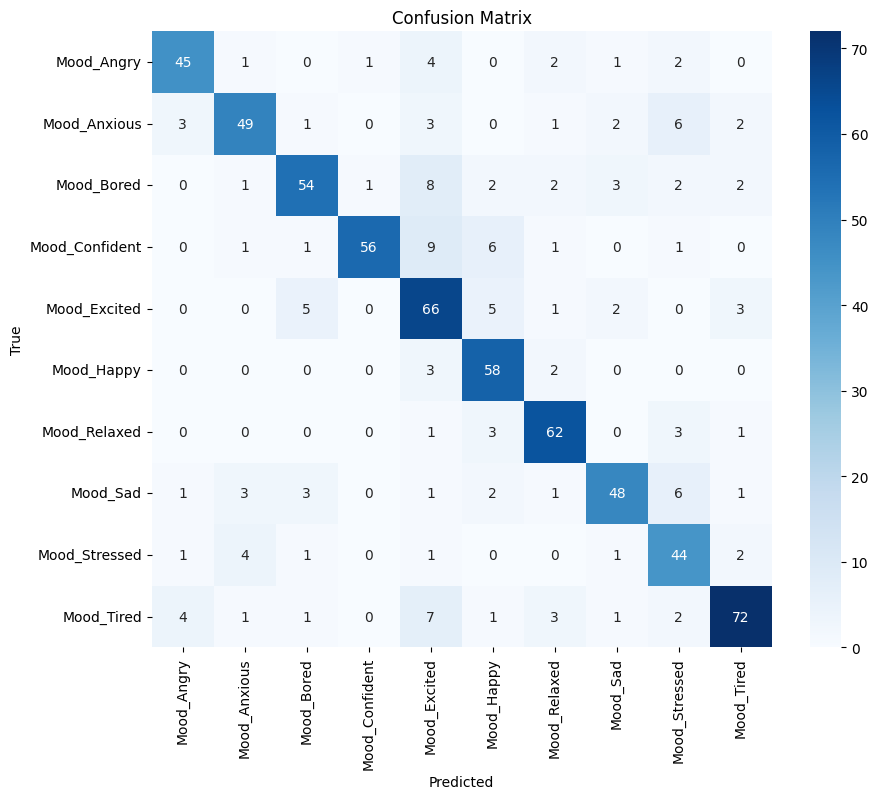

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_true, y_pred, target_names=onehot.get_feature_names_out(['Mood'])))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=onehot.get_feature_names_out(['Mood']), yticklabels=onehot.get_feature_names_out(['Mood']))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [37]:
test_texts = [
    "I feel happy and joyful.",
    "I am so stressed about my exams.",
    "I don't have the energy to do anything.",
    "I'm feeling so relaxed and calm.",
    "I'm full of excitement today!",
    "I'm really angry about what happened.",
    "I'm worried about the future."
]

for text in test_texts:
    mood, yoga = predict_mood_with_yoga(text)
    print(f"Input: {text}")
    print(f"Predicted Mood: {mood}")
    print(f"Recommended Yoga: {yoga}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Input: I feel happy and joyful.
Predicted Mood: Happy
Recommended Yoga: Vinyasa Yoga

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Input: I am so stressed about my exams.
Predicted Mood: Stressed
Recommended Yoga: Restorative Yoga

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Input: I don't have the energy to do anything.
Predicted Mood: Tired
Recommended Yoga: Bikram Yoga

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Input: I'm feeling so relaxed and calm.
Predicted Mood: Relaxed
Recommended Yoga: Meditation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Input: I'm full of excitement today!
Predicted Mood: Excited
Recommended Yoga: Power Yoga

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Input: I'm really angry about what happened.
Predicted Mood: Angry
Recommended Yoga: Ashtanga Yoga

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Input: I'm worried about the future.
Predicted Mood: Tired
Recommended Yoga: Bikram Yoga

